<a href="https://colab.research.google.com/github/PerfectMach1ne/uni-ai-ml/blob/main/wyklad4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regresja liniowa**

Model uczenia maszynowego pozwalający na wykonanie predykcji cech ilościowych. Wartość cechy ilościowej wyznaczana jest na podstawie innych cech.

Przykład regresji to na przykład wyznaczenie ceny mieszkania na podstawie np. liczby pokojów, piętra, odległości od centrum, stacji metra. Dwie ceny możemy porównać (<)

Przykład:

Chcemy sprzedać mieszkanie, ale nie orientujemy się w cenach nieruchomości, nie wiemy jaka cena jest adekwatna. Chcemy znaleźć zależności, które decydują o cenie nieruchomości.
Możemy wziąć zbiór danych, zawiera informacje o innych mieszkaniach na rynku. Na jego podstawie zrobić model. Za pomocą stworzonego modelu będziemy mogli oszacować cenę dla naszego mieszkania.

Jest to przypadek regresji liniowej, która może zostać zapisana jako:

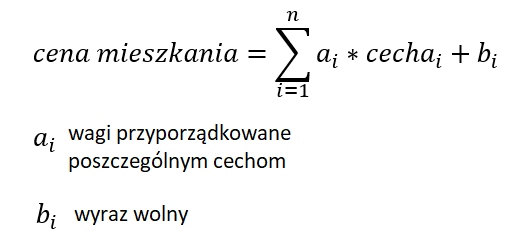

Im wartość wagi jest większa, tym większy jest wpływ cechy na wynik końcowy, czyli cenę mieszkania. Jeśli współczynnik jest ujemny wtedy ma negatywny wpływ na wynik.
W tym przypadku zadaniem modelu jest dobór wag (współczynników wielomianów), tak aby odpowiedzi modelu różniły się od prawdziwych znanych odpowiedzi w możliwie najmniejszym stopniu.
Istnieją różne metody wyznaczania współczynników wielomianu, ale najbardziej popularna jest metoda najmniejszych kwadratów.

Załóżmy, że cenę mieszkania chcemy wyznaczyć na podstawie: liczby pokojów, dzielnicy, odległości od centrum. Wzór na cenę mieszkania mógłby wyglądać następująco:

cena mieszkania=10* liczba pokojów + 20* dzielnica + 30* centrum

Zatem największy wpływ na cenę mieszkania ma odległość od centrum a najmniejszy liczba pokoi



Problem regresji liniowej sprowadza się do problemu optymalizacji funkcji MSE (Mean Square Error).
Funkcja MSE to funkcja strat, która mówi nam jak bardzo nasz model się myli.

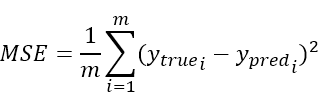

**Ocena modeli regresyjnych - metryki**

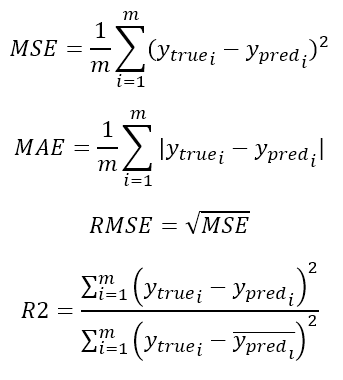

**Matematyczny zapis**

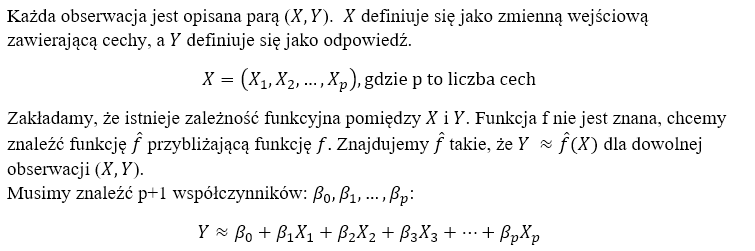



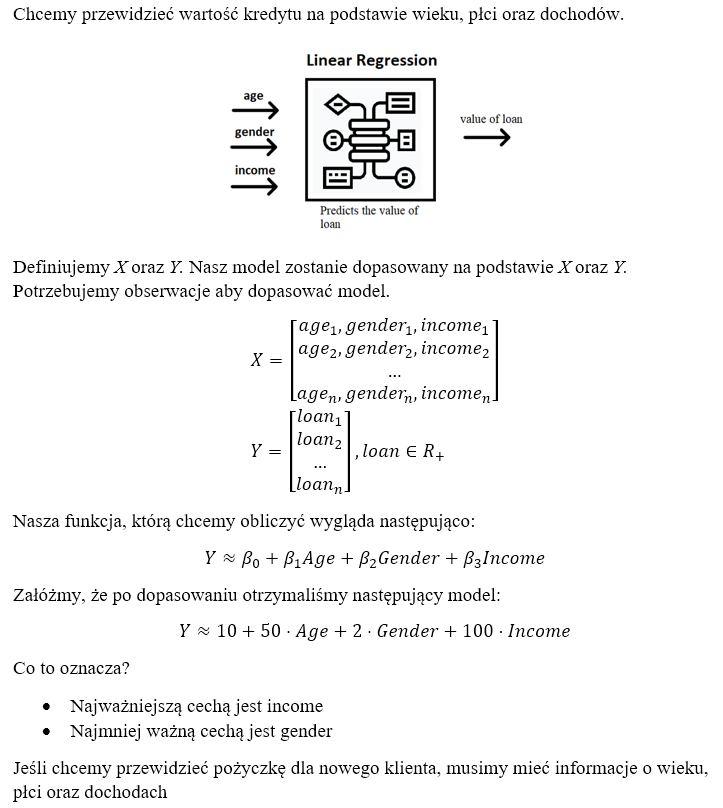

Wykres przedstawiający ideę regresji liniowej z wykorzystaniem jednej cechy - Income

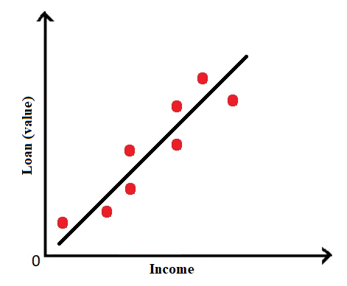

**Przykład jak stworzyć model przewidujący cenę mieszkania**

Jako zbiór danych zostanie wykorzystany zbiór Boston Housing. Zbiór można znaleźć i pobrać z https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data
Zbiór zawiera 506 obserwacji, każda z których opisuje jedną dzielnicę. Zbiór danych zawiera 14 cech:

Input features in order:

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

Output variable:

1) MEDV: Median value of owner-occupied homes in $1000's [k$]


Cechy niezależne to cechy oznaczone jako input, a cechą zależną jest cecha oznaczona jako output.
Na podstawie dancyh dzielnicy, na której chcemy sprzedać mieszkanie, będziemy mogli wyznaczyć orientacyjną cenę mieszkania w oparciu o medianową cenę.

In [ ]:
import os
from pathlib import Path
import pandas as pd
current_path = Path(os.path.dirname(os.path.abspath("__file__")))

file_name="boston.csv"
data=pd.read_csv(os.path.join(current_path,file_name))

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
y=data["MEDV"]
X=data.drop(columns=["MEDV"])

y=y.reset_index(drop=True)
X=X.reset_index(drop=True)

In [ ]:
X.shape

(506, 13)

In [ ]:
y.shape

(506,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Rozmiar X_train", X_train.shape)
print("Rozmiar X_test", X_test.shape)
print("Rozmiar y_train", y_train.shape)
print("Rozmiar y_test", y_test.shape)



Rozmiar X_train (404, 13)
Rozmiar X_test (102, 13)
Rozmiar y_train (404,)
Rozmiar y_test (102,)


In [ ]:
from sklearn.preprocessing import StandardScaler

#przeskalowanie danych
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

X_test=scaler.transform(X_test)

In [ ]:
model=LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([17.53986686, 32.32038826, 40.83537162, 22.18389569,  8.01937203,
       34.9173919 , 20.38190049, 15.32475384, 41.45390497, 44.12073071,
       38.53907242, 35.37822008,  7.89342853, 40.28209772, 24.98345591,
       25.31762632, 30.77421952, 19.57682008, 29.39809076, 11.11679998,
       33.64938961, 19.4492157 , 21.01688419, 14.13239638, 22.31770261,
        6.01202588, 16.22564237, 16.56649142, 28.3901591 , 18.70893738,
       20.43258217, 20.39429992, 23.7935182 , 20.57227067, 19.27320061,
       24.52728339, 16.82995652,  8.8779901 , 20.72373464,  8.7598156 ,
       23.07985098, 13.88206841,  3.77198404,  7.39090502, 20.10293637,
       18.03912623, 18.9234392 , 40.16227495, 20.99081574, 15.42675364,
       12.96754507, 20.26854396, 24.81344049, 35.79684619, 32.87882922,
       11.89799884, 18.80114504, 19.12058185, 22.57254949, 20.23049504,
       19.44894945, 24.74221934, 19.95127821, 19.29636792, 15.25750618,
       14.95382738, 14.27273502, 12.64466299, 27.2203403 , 30.67

In [ ]:
y_test

323    18.5
468    19.1
95     28.4
267    50.0
72     22.8
       ... 
431    14.1
213    28.1
274    32.4
110    21.7
308    22.8
Name: MEDV, Length: 102, dtype: float64

In [ ]:
import numpy as np
y_test=np.array(y_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

19.562028960557562

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3.2052673347249536

In [ ]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7580113898929746

Text(0, 0.5, 'y_pred')

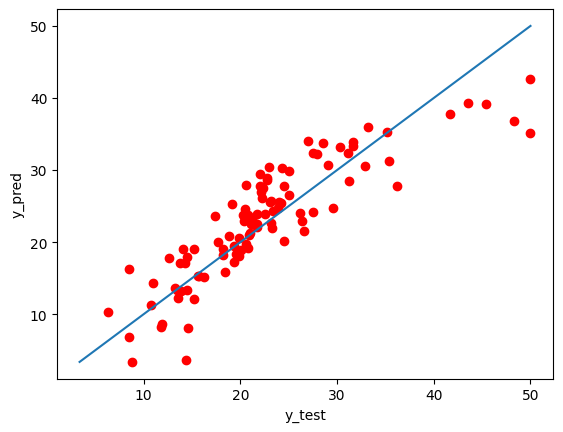

In [ ]:
import matplotlib.pyplot as plt

min_val=min(y_test.min(), y_pred.min())
max_val=max(y_test.max(), y_pred.max())
plt.scatter(y_test, y_pred, color='red')
plt.plot([min_val, max_val], [min_val, max_val])
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [ ]:
independent_feature_names=list(X.columns)
weights=model.coef_
intercept=model.intercept_

In [ ]:
independent_feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [ ]:
weights

array([-0.7181093 ,  1.16423303,  0.41182393,  0.93435772, -2.05673021,
        2.55654155,  0.25654483, -3.00692093,  2.28020998, -2.01658552,
       -1.93780994,  0.78062277, -4.10158719])

In [ ]:
intercept

22.847772277227726

In [ ]:
len(weights)

13

[Text(0, 0, 'CRIM'),
 Text(1, 0, 'ZN'),
 Text(2, 0, 'INDUS'),
 Text(3, 0, 'CHAS'),
 Text(4, 0, 'NOX'),
 Text(5, 0, 'RM'),
 Text(6, 0, 'AGE'),
 Text(7, 0, 'DIS'),
 Text(8, 0, 'RAD'),
 Text(9, 0, 'TAX'),
 Text(10, 0, 'PTRATIO'),
 Text(11, 0, 'B'),
 Text(12, 0, 'LSTAT')]

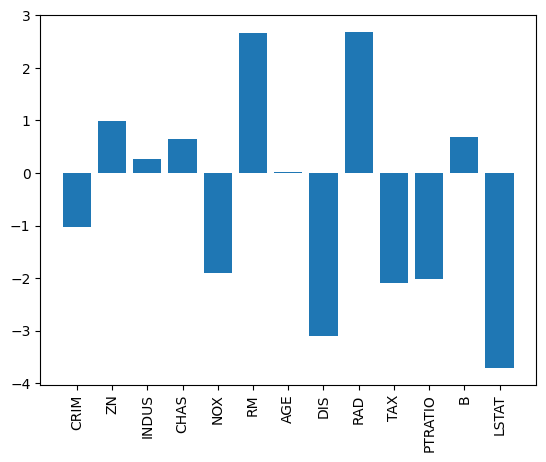

In [ ]:
fig, ax = plt.subplots(1,1)
x=np.arange(len(independent_feature_names))
ax.bar(x, weights)
ax.set_xticks(x)
ax.set_xticklabels(independent_feature_names, rotation=90)

**Zadanie do wykonania**

Na podstawie zbioru Diabets wykonaj podobne kroki jak te przedstawione w tym notatniku. Zastosuj cross-walidację do testowania swojego modelu.
Za pomocą poniższego kodu możesz pobrać zbiór danych

In [ ]:
from sklearn.datasets import load_diabetes()
data=load_diabetes()

Czy każda regresja przewiduje cechę ilościową?

Nie, model regresji logistycznej przewiduje cechę jakościową i wykorzystywany jest w problemie klasyfikacji.

Algorytmy klasyfikacji przewidują prawdopodobieństwo przynależności obserwacji do jednej z kategorii. W tym sensie zachowują się one również jak metody regresji liniowej – przewidują wartość prawdopodobieństwa, która jest ilościowa. Poniższy rysunek pokazuje różnicę między regresją liniową i logistyczną.

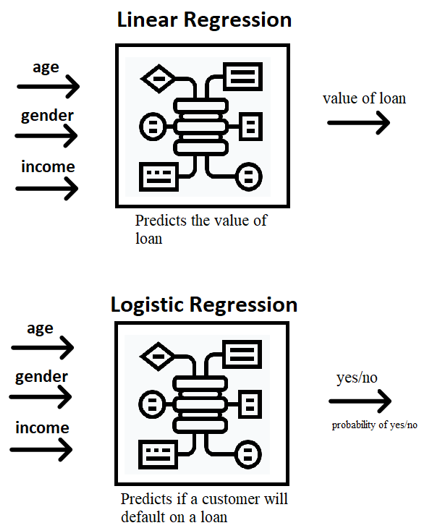

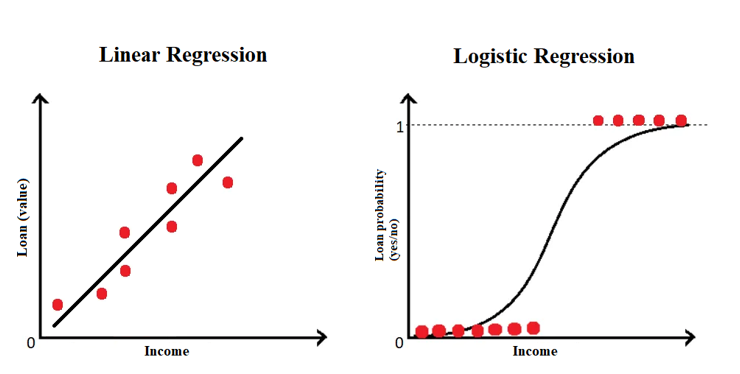

Dlaczego nie powinniśmy zastosować regresji liniowej zamiast logistycznej? Są co najmniej dwa powody, aby tego nie robić:

1. Nie możemy używać kodowania odpowiedzi jakościowej za odpowiedź ilościową, ponieważ kodowanie implikuje uporządkowanie wartości (wyjątkiem jest odpowiedź binarna z kodowaniem 0/1)
Na przykład:
Nasza odpowiedź jakościowa zawiera zestaw kolorów oczu (zielony, niebieski, brązowy). Kodujemy tę jakościową odpowiedź na {1,2,3}. Nie możemy powiedzieć, że kolor brązy jest większy od niebieskiego lub że różnica między kolorem brązowym a niebieskim jest taka sama jak w przypadku kolorou zielonego i niebieskiego.

2. Jeśli zastosujemy regresję liniową, niektóre z naszych szacunków mogą wykraczać poza przedział [0,1], co utrudnia ich interpretację jako prawdopodobieństwa. Nawet dla klasyfikacji binarnej nie będzie to dobre rozwiazanie.


Regresja logistyczna jest metodą parametryczną - oznacza to, że wystarczy obliczyć współczynniki, aby oszacować prawdopodobieństwo.
Proces ten przebiega identycznie jak w przypadku regresji liniowej. Możemy wtedy użyć funkcji logistycznej, która daje nam wartości od 0 do 1 zamiast wielomianu liniowego, jak w regresji liniowej.
Aby dopasować model – w tym przypadku – do obliczenia współczynnika, stosujemy metodę zwaną największą wiarygodnością.

Regresję logistyczną można zastosować zarówno w klasyfikacji binarnej, jak i wieloklasowej.

Regresja logistyczna zwraca prawdopodobieństwo, więc musimy pomyśleć o progu. Jest to wartość, powyżej której przypisujemy obserwację do jednej klasy, a poniżej której do drugiej. Jest to punkt graniczny, który pozwala na podjęcie decyzji o przynależności danego obiektu do jednej z klas na podstawie wartości przewidywanego prawdopodobieństwa.

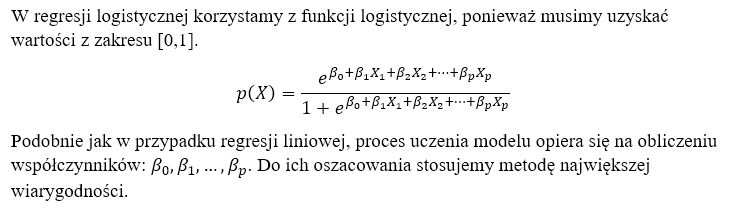

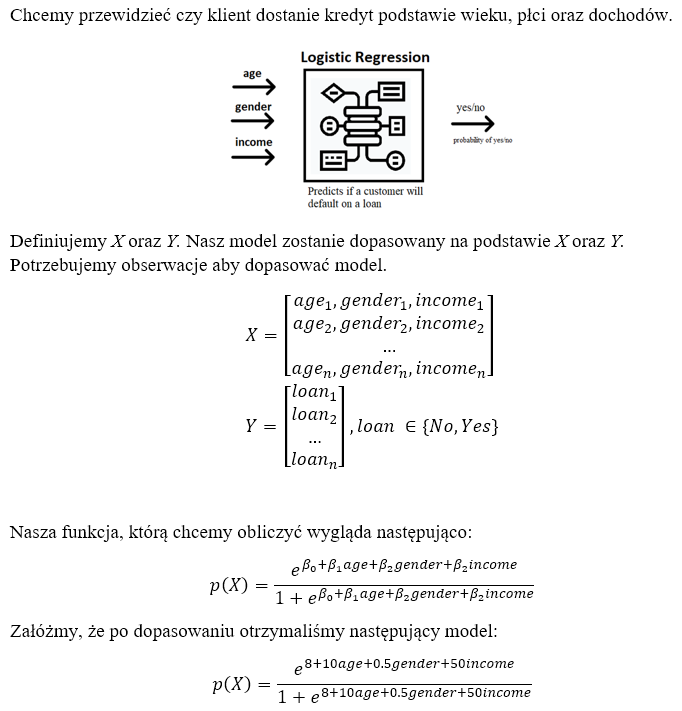